## Profile Analysis

In this project we will cover the concept of clustering, which is a unsupervised learning algorithm that involves grouping similar data points together based on their characteristics. The goal of clustering is to find similarities within a dataset and group similar data points together while keeping dissimilar data points separate.

Think of this project from a business perspective. Based on the customer profile, the business can identify different clusters and customize the experience, offers, services, products, and others based on this clusterization.

We will be comparing the clustering using K-means and DBSCAN, so we understand the difference between both methodologies. 

## Task 1: Understand the problem statement

When analysing a dataset, it is important to to ensure ethical analysis practices, adressing issues of bias and credibility. This is a fundamental step on the **PREPARE** stage of data analysis. For this analysis, we want to check for bias, specially when it comes to Gender and Age distribution.

* What is our customer profile? What is the distribution of our customers when it comes to gender, age, annual income, and spending score?
* Is there any correlation between those features? What feature is more related to the spending score?
* How can we train an unsupervised learning algorithm that involves grouping similar data points together based on the characteristics?

The data set contains some information that will give us the answer. The dataframe has the following information:

* CustomerID: unique ID assigned to the customer.
* Gender: Gender of the applicant (Male, Female).
* Age: Represents the age of the applicant. Indicates the applicant's maturity level (from 18 to 70).
* Annual income (kDollars): annual income of the customer measured in k dollars.
* Spending Score: Score assigned by the mall based on customer behavior and spending score.

## Task 2: Import libraries and datasets

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it.

In [1]:
#Data
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib as plt
from matplotlib import style

#Clustering Models
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#cd to directory with file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


The **.read_csv** is a method to read the file and link it to the variable, in this case admission_df

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


The **.head(n)** is a method that returns a specified number of rows, string from the top. n is the parameter, and by default, .head() method returns the first 5 rows.

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The **.count()** method will give us an idea on how many data we have for each column in the data frame.

In [5]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

Now that we have an ideia of how many values we have in this dataframe, we are going to use a combination of methods to check how many null values are in the data frame:

In [6]:
# checking the null values. If I have any null values, we can drop or fill with mean values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Now we can check the dataframe information by using the method .info(). Using this method we will have the information of null values, data type, and columns.

In [7]:
# Check the dataframe information. How many elements we have with the data type for each of them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## TASK #3: PERFORM EXPLORATORY DATA ANALYSIS W/ DATA VISUALIZATION

Now that we have imported the data set, defined the dataframe, imported libraries and checked the data, we achieved the prepare and process the data, so we can go on and do the analysis and some visualization based on the insights that we got here.

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of paterns and relationships within the data. It is a powerful tool for understanding complex data and communicating insights effectively.

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Based in the **describe()** method, we can see important information such: the range of age is between 18 to 70 years old, The average annual income is 60k, and the minimum is 15k and the max is 137k. 

Considering the range between 18 and 70 years old, how much is the mean income grouped by age, for every 4 years? Does older people make more money than young, or vice versa?

In [9]:
age_bins = pd.cut(df['Age'], bins=range(18,71,4), right=False)
df_age = df.groupby(by=age_bins)
mean_income_by_age = df_age['Annual Income (k$)'].mean()
mean_income_by_age 

Age
[18, 22)    48.318182
[22, 26)    42.062500
[26, 30)    67.882353
[30, 34)    73.103448
[34, 38)    65.043478
[38, 42)    72.764706
[42, 46)    67.600000
[46, 50)    59.333333
[50, 54)    54.000000
[54, 58)    63.000000
[58, 62)    55.444444
[62, 66)    46.600000
[66, 70)    52.200000
Name: Annual Income (k$), dtype: float64

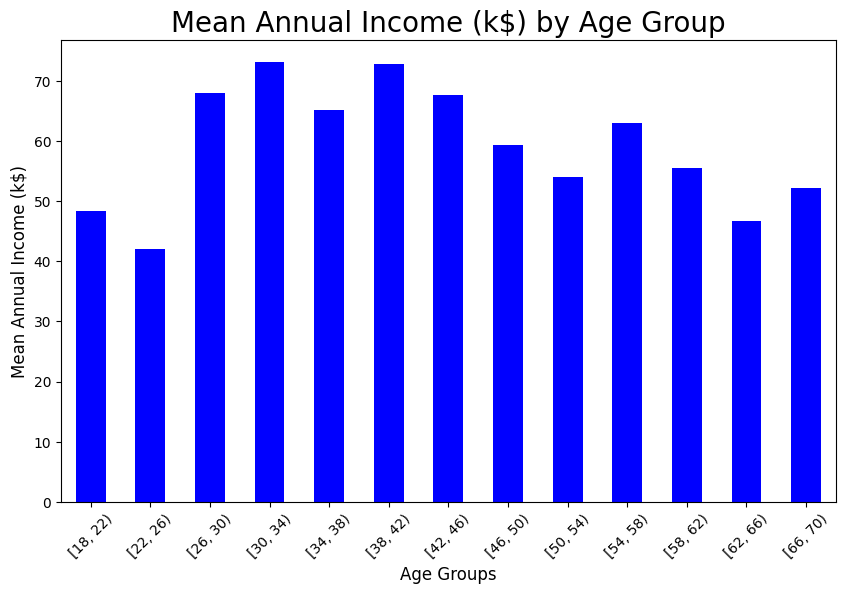

In [10]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_income_by_age.plot(kind='bar', color='b')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean Annual Income (k$)', fontsize=12)
plt.title('Mean Annual Income (k$) by Age Group', fontsize=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

Now, let's take a look in the mean annual income based on the gender.

In [11]:
df_gender = df.groupby(by='Gender')
mean_income_gender = df_gender['Annual Income (k$)'].mean()
mean_income_gender

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

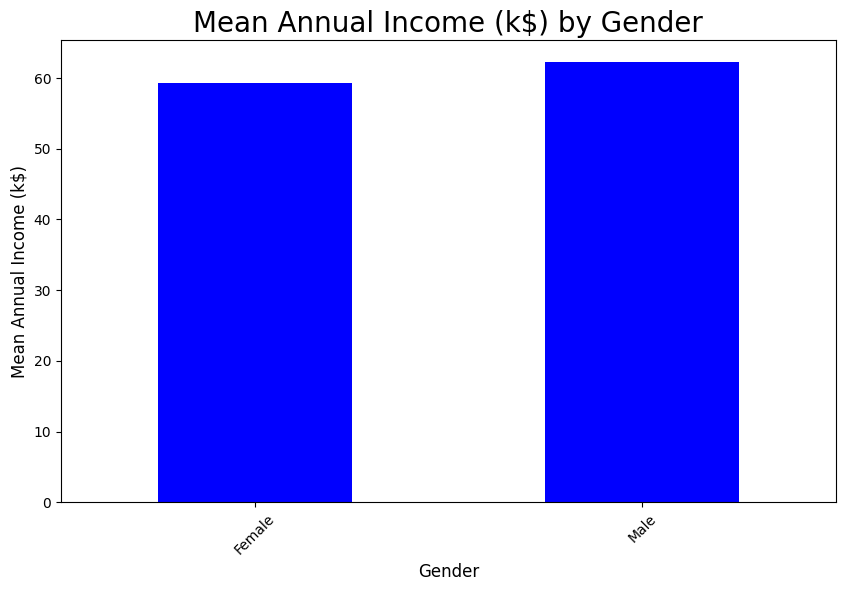

In [12]:
# Create a bar plot
plt.figure(figsize=(10, 6))
mean_income_gender.plot(kind='bar', color='b')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Annual Income (k$)', fontsize=12)
plt.title('Mean Annual Income (k$) by Gender', fontsize=20)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

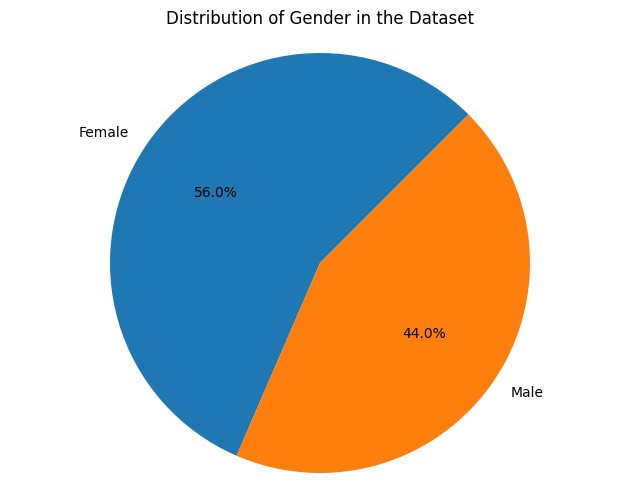

In [13]:
gender_count = df['Gender'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=45)
plt.title("Distribution of Gender in the Dataset")
plt.axis('equal')

plt.show()

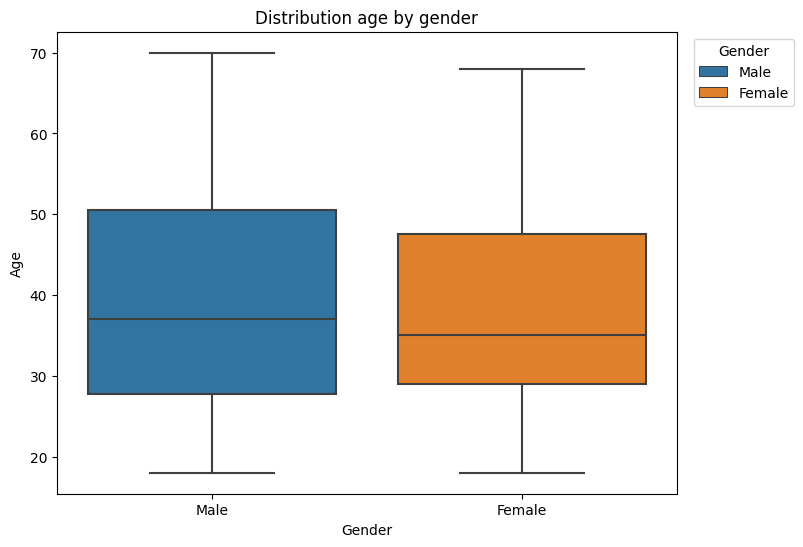

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Age', x='Gender', data=df, hue='Gender', dodge=False)
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution age by gender')
plt.show()

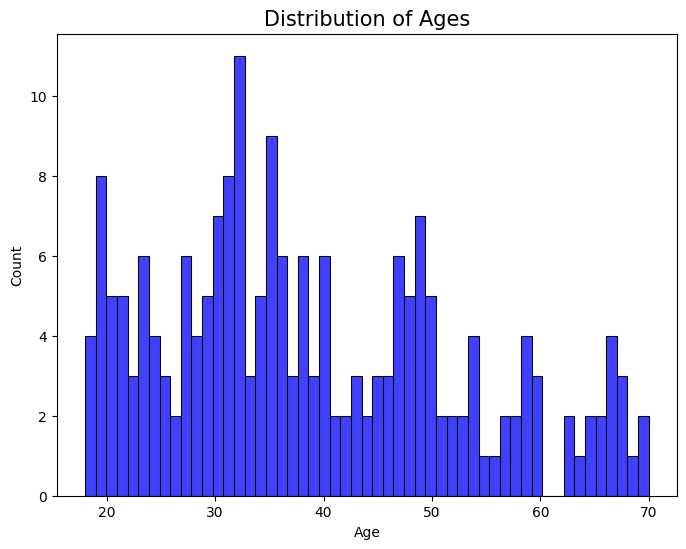

In [15]:
plt.figure(figsize=(8,6))
ax = sns.histplot(df['Age'], bins=53, kde=False, color='b')
plt.title('Distribution of Ages', fontsize=15)
plt.show()

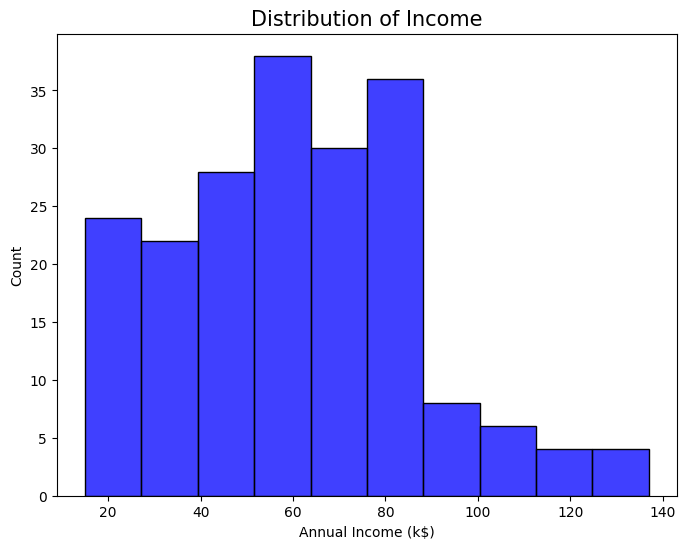

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual Income (k$)'], kde=False, color='b')
plt.title('Distribution of Income', fontsize=15)
plt.show()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

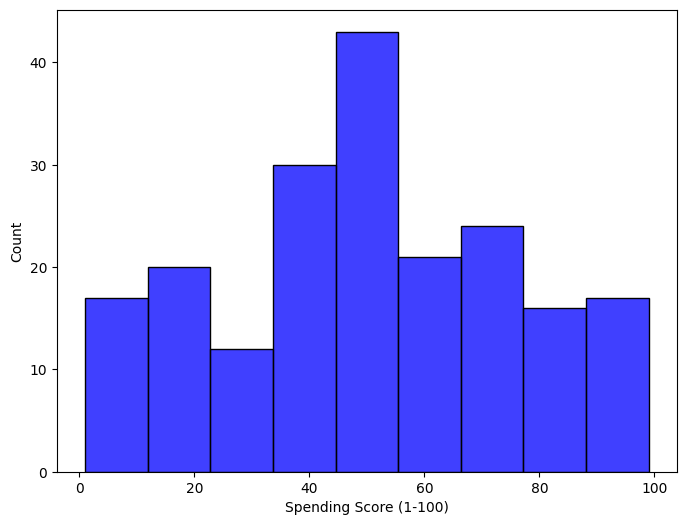

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'], kde=False, color='b')
plt

There is not relationship between the features. The biggest corelation is between Age and Spending Score, and is a negative relationship, meaning that as X increases, y decreases. The biggest the age, the highest the spending score.

Text(0.5, 1.0, 'Annual Income (k$) vs Age')

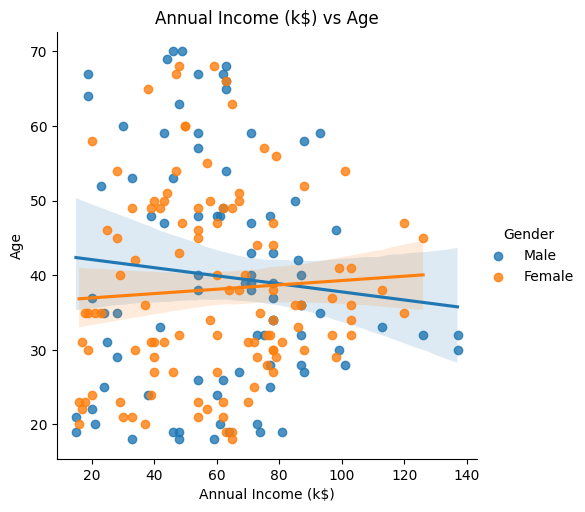

In [18]:
sns.lmplot(x="Annual Income (k$)", y="Age", data=df, hue='Gender')
plt.title("Annual Income (k$) vs Age")

Text(0.5, 1.0, 'Annual Income (k$) vs Spending Score (1-100)')

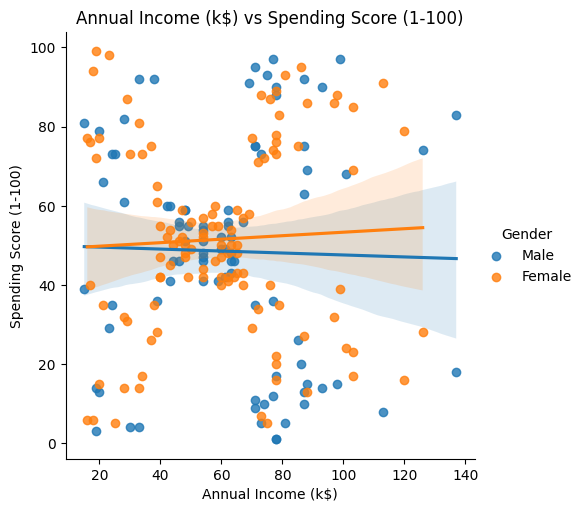

In [19]:
sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue='Gender')
plt.title("Annual Income (k$) vs Spending Score (1-100)")

Text(0.5, 1.0, 'Spending Score (1-100) vs Age')

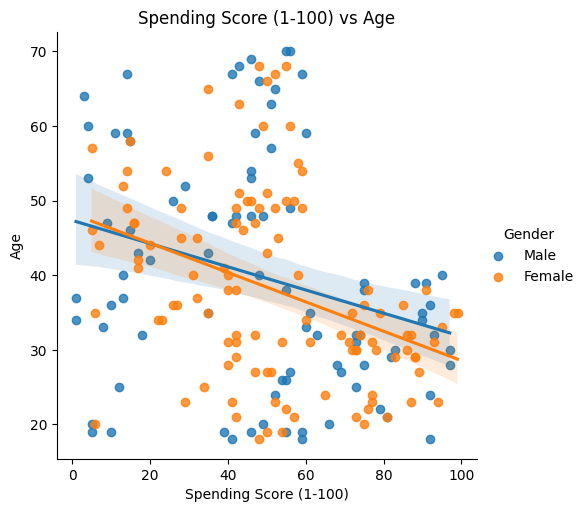

In [20]:
sns.lmplot(x="Spending Score (1-100)", y="Age", data=df, hue='Gender')
plt.title("Spending Score (1-100) vs Age")

## Task #4: CREATE CLUSTERING WITH K-MEANS AND DBSCAN

In this task, we are going to create the clusters using K-means and DBSCAN and compare results. To create the clustering, we are going to consider 2 features only. The ones I selected to the analysis are: Spending Score and Annual Income. Althought they don't have a direct correlation, I am going to plot clusters considering this 2 features, because they are the most relevant ones.

Starting with DBSCAN, we need to select the values for **epsilon**. Below, I made an exercise of how much outliers in percentage would exist considering the value of epsilon. To calculate the value of epsilon, I am considering the default value for min_samples as 5

In [21]:
df.shape

(200, 5)

In [22]:
df_features = df

In [23]:
df_features.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)
df_features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [24]:
outliers = []
eps_range = np.linspace(0.01,11,100)

for eps in eps_range:
  dbscan = DBSCAN(eps=eps)
  y_dbscan = dbscan.fit_predict(df_features)
  points = 100 * np.sum(y_dbscan == -1)/len(y_dbscan)
  outliers.append(points)

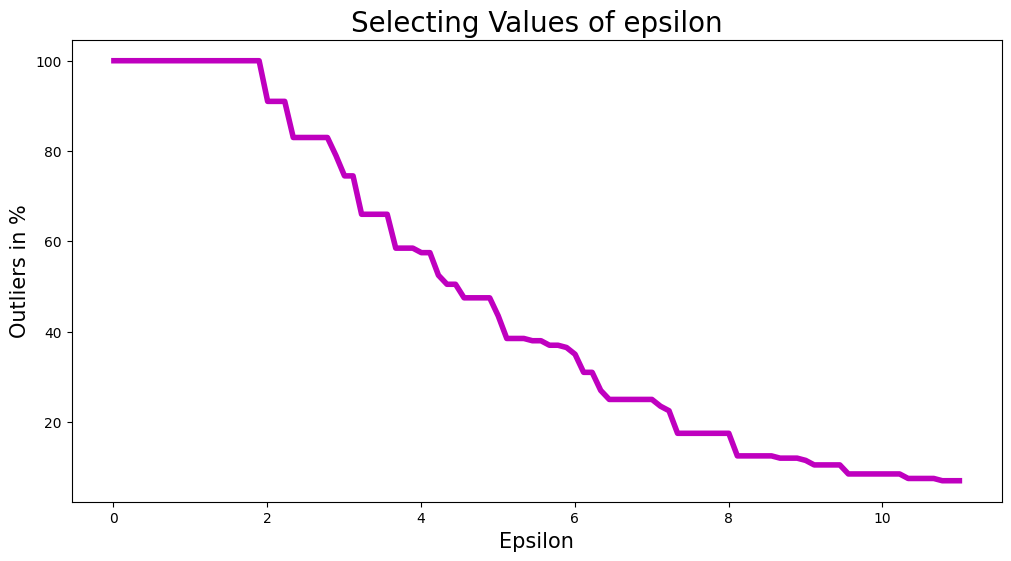

In [25]:
plt.figure(figsize = (12,6))
plt.plot(eps_range, outliers, 'm', lw=4)
plt.ylabel('Outliers in %', fontsize=15)
plt.xlabel('Epsilon', fontsize=15)
plt.title('Selecting Values of epsilon', fontsize=20)
plt.show()

Selecting the **minimum samples** for clusters.

Now that I am evaluating the numbers of samples for clusterization, I am considering the eps=9, based on the previous exercise

In [26]:
samp_outliers = []
samples_range = np.arange(1,11)

for samples in samples_range :
    dbscan = DBSCAN(eps= 9, min_samples = samples)
    y_dbscan = dbscan.fit_predict(df_features)
    points = 100 * np.sum(y_dbscan == -1)/len(y_dbscan)
    samp_outliers.append(points)

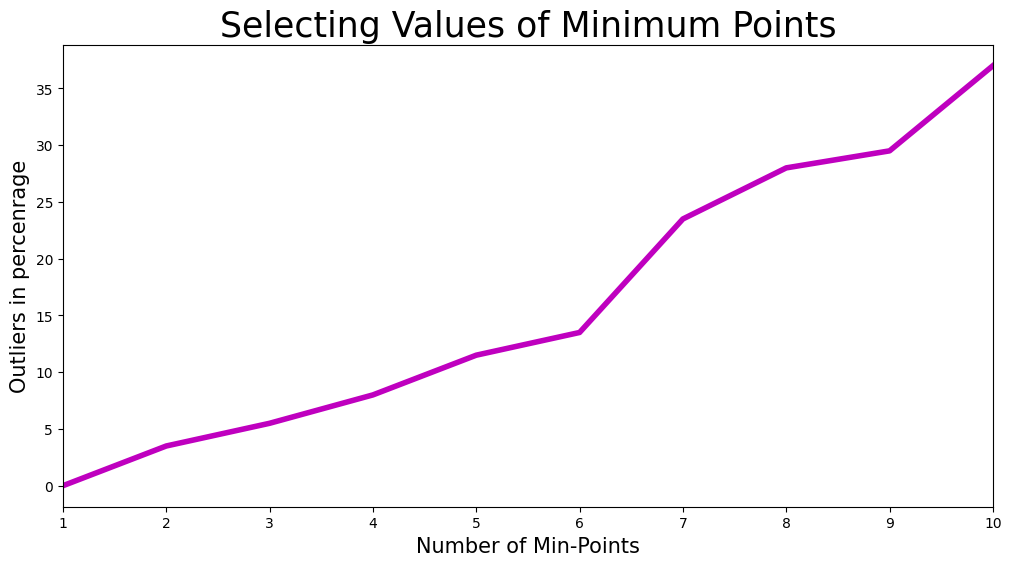

In [27]:
plt.figure(figsize = (12,6))
plt.plot(samples_range, samp_outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Number of Min-Points", fontsize = 15)
plt.title("Selecting Values of Minimum Points", fontsize = 25)
plt.xlim([1,10])
plt.show()

Now, let's evaluate the **Silhouette Score**.

Based on the number of min_points and eps, I came to a conclusion that I could work with an eps of 9 and a min_samples of 2. Now, I will evaluate both silhouette and CH to make sure that those numbers make sense.

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
eps_range = np.linspace(0.1, 10, 10)

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    y_dbscan = dbscan.fit_predict(df_features)
    silhouette = silhouette_score(df_features, y_dbscan)
    silhouette_scores.append(silhouette)

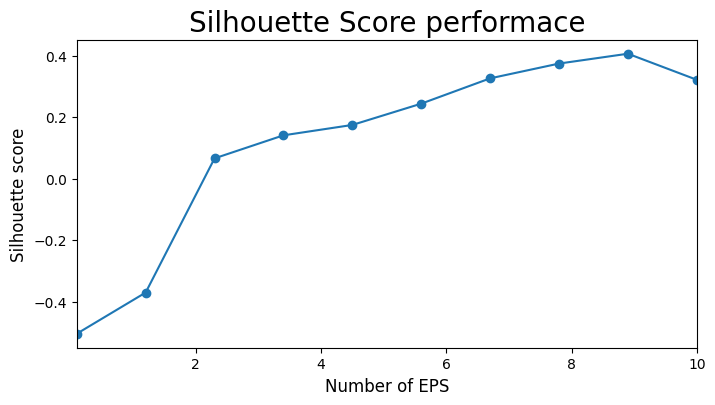

In [29]:
plt.figure(figsize=(8,4))
plt.plot(eps_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score performace', fontsize=20)
plt.xlabel('Number of EPS', fontsize=12)
plt.ylabel('Silhouette score', fontsize=12)
plt.xlim(min(eps_range), max(eps_range))
plt.show()

In [30]:
dbscan = DBSCAN(eps = 8, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'Silhouette score(eps = 8, min_samples=2): {silhouette_score(df_features,y_dbscan)}')

Silhouette score(eps = 8, min_samples=2): 0.3846197653138049


In [31]:
dbscan = DBSCAN(eps = 9, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'Silhouette score(eps = 9, min_samples=2): {silhouette_score(df_features,y_dbscan)}')

Silhouette score(eps = 9, min_samples=2): 0.4437895954843984


In [32]:
dbscan = DBSCAN(eps = 10, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'Silhouette score(eps = 10, min_samples=2): {silhouette_score(df_features,y_dbscan)}')

Silhouette score(eps = 10, min_samples=2): 0.32209816683577636


Now, let's evaluate the **CH index**

In [33]:
from sklearn.metrics import calinski_harabasz_score
dbscan = DBSCAN(eps = 8, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'CH index (eps = 8, min_samples=2): {calinski_harabasz_score(df_features,y_dbscan)}')

CH index (eps = 8, min_samples=2): 87.01042537421907


In [34]:
dbscan = DBSCAN(eps = 9, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'CH index (eps = 9, min_samples=2): {calinski_harabasz_score(df_features,y_dbscan)}')

CH index (eps = 9, min_samples=2): 126.76300700955304


In [35]:
dbscan = DBSCAN(eps = 10, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)
print(f'CH index (eps = 10, min_samples=2): {calinski_harabasz_score(df_features,y_dbscan)}')

CH index (eps = 10, min_samples=2): 60.159221990351476


**Comparing K-Means with DBSCAN with clustering**

In [36]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 'auto')
y_kmeans = kmeans.fit_predict(df_features)

dbscan = DBSCAN(eps = 9, min_samples=2)
y_dbscan = dbscan.fit_predict(df_features)

In [37]:
df_features = np.array(df_features)

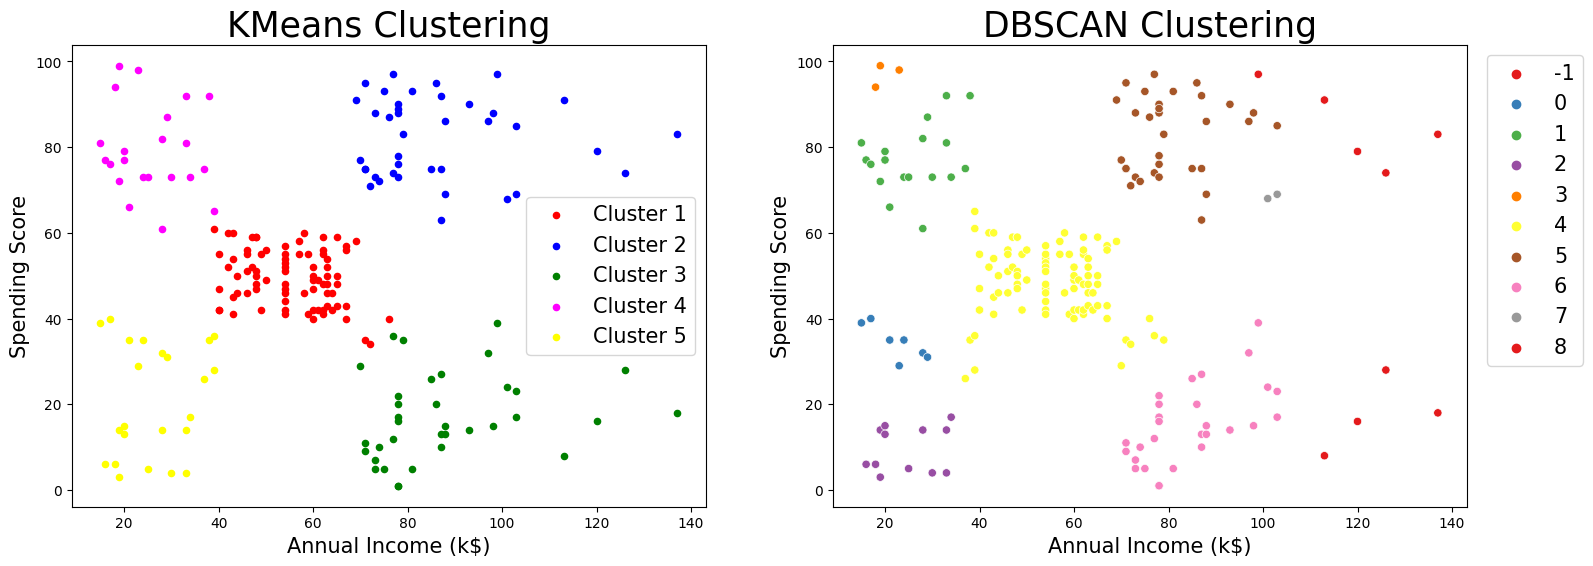

In [38]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].scatter(df_features[y_kmeans == 0, 0], df_features[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
ax[0].scatter(df_features[y_kmeans == 1, 0], df_features[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
ax[0].scatter(df_features[y_kmeans == 2, 0], df_features[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
ax[0].scatter(df_features[y_kmeans == 3, 0], df_features[y_kmeans == 3, 1], s = 20, c = 'magenta', label = 'Cluster 4')
ax[0].scatter(df_features[y_kmeans == 4, 0], df_features[y_kmeans == 4, 1], s = 20, c = 'yellow', label = 'Cluster 5')
ax[0].set_xlabel('Annual Income (k$)', fontsize = 15)
ax[0].set_ylabel('Spending Score', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('KMeans Clustering', fontsize = 25)

sns.scatterplot(data = df_features, x = df_features[:,0], y = df_features[:,1], hue = y_dbscan, palette = 'Set1')
ax[1].set_xlabel('Annual Income (k$)', fontsize = 15)
ax[1].set_ylabel('Spending Score', fontsize = 15)
ax[1].legend(fontsize = 15)
ax[1].set_title('DBSCAN Clustering', fontsize = 25)
ax[1].legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.2, 1))


plt.show()

## Conclusions

Based on the EPS, Min_Points exercises & Silhouette and CH Indexes, I came to a conslusion that for DBSCAN, the best number of clustering would be 9, with a min_points of 2. This is slightly different from the Clusters based on K-Means, that resulted in a clusterization of 5 groups.

To get the numbers for the DBSCAN numbers, took me while, testing the epsilon and minimum points, but I think there are intereseting results, compared to the K-Means.